In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt

In [4]:


# Load the training and test datasets
test_data = pd.read_csv('/content/cleaned_data_test.csv')
train_data = pd.read_csv('/content/cleaned_data_train.csv')

In [5]:


# Convert 'Cancer' column to numeric
train_data['Cancer'] = train_data['Cancer'].astype(int)
test_data['Cancer'] = test_data['Cancer'].astype(int)

# Separate features (FPKM) and target (Cancer)
X_train = train_data.drop(columns=['Cancer', 'Sample'])
y_train = train_data['Cancer']

X_test = test_data.drop(columns=['Cancer', 'Sample'])
y_test = test_data['Cancer']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
















In [6]:
# Random Forest Model
print("\n### Random Forest Model ###")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)



### Random Forest Model ###


RandomForestClassifier(random_state=42)

In [7]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

In [8]:
# Evaluate Random Forest
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9473684210526315
F1 Score: 0.9702970297029703

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.96      0.98      0.97        50

    accuracy                           0.95        57
   macro avg       0.90      0.85      0.87        57
weighted avg       0.95      0.95      0.95        57



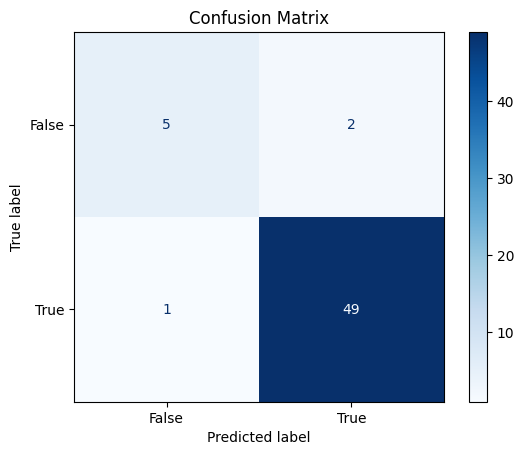

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_importances = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)


Top 20 Features by Importance:
ENSG00000131797    0.007868
ENSG00000155657    0.007470
ENSG00000168685    0.007019
ENSG00000198851    0.006676
ENSG00000072110    0.006535
ENSG00000158710    0.006270
ENSG00000145649    0.006128
ENSG00000211788    0.006042
ENSG00000078902    0.005993
ENSG00000169398    0.005889
ENSG00000163492    0.005400
ENSG00000149781    0.005305
ENSG00000142657    0.005177
ENSG00000137575    0.005110
ENSG00000174501    0.004812
ENSG00000105355    0.004574
ENSG00000014216    0.004433
ENSG00000152601    0.004414
ENSG00000088053    0.004343
ENSG00000103876    0.004312
dtype: float64


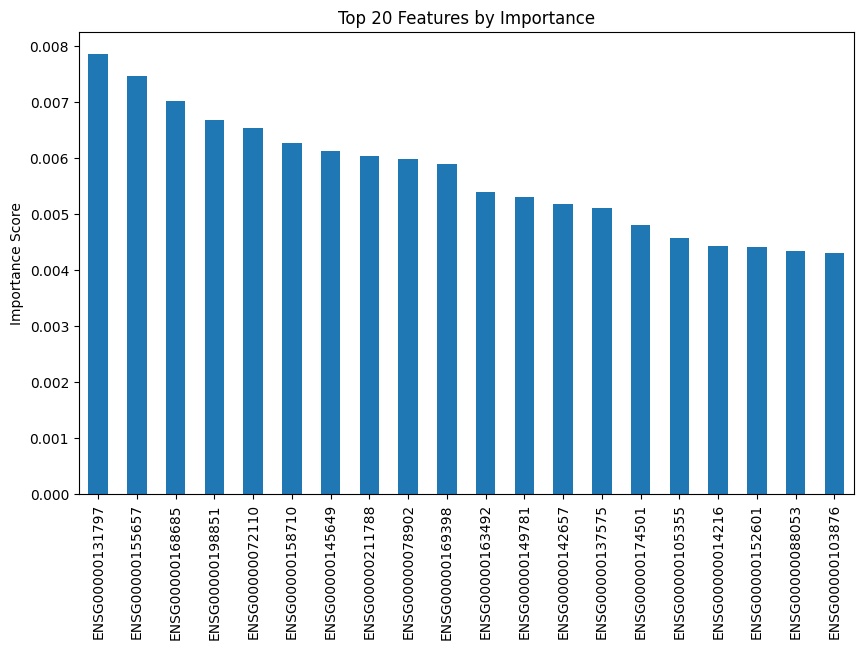

In [11]:
# Top 20 most important features
print("\nTop 20 Features by Importance:")
print(feature_importances.head(20))

# Plot Top 20 Features
feature_importances.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Features by Importance')
plt.ylabel('Importance Score')
plt.show()


Bottom 20 Features by Importance:
ENSG00000202190    0.0
ENSG00000202191    0.0
ENSG00000202193    0.0
ENSG00000202195    0.0
ENSG00000202198    0.0
ENSG00000202199    0.0
ENSG00000202200    0.0
ENSG00000202205    0.0
ENSG00000202206    0.0
ENSG00000202211    0.0
ENSG00000202215    0.0
ENSG00000202216    0.0
ENSG00000202217    0.0
ENSG00000202220    0.0
ENSG00000202222    0.0
ENSG00000202224    0.0
ENSG00000202225    0.0
ENSG00000202227    0.0
ENSG00000202229    0.0
ENSG00000273493    0.0
dtype: float64


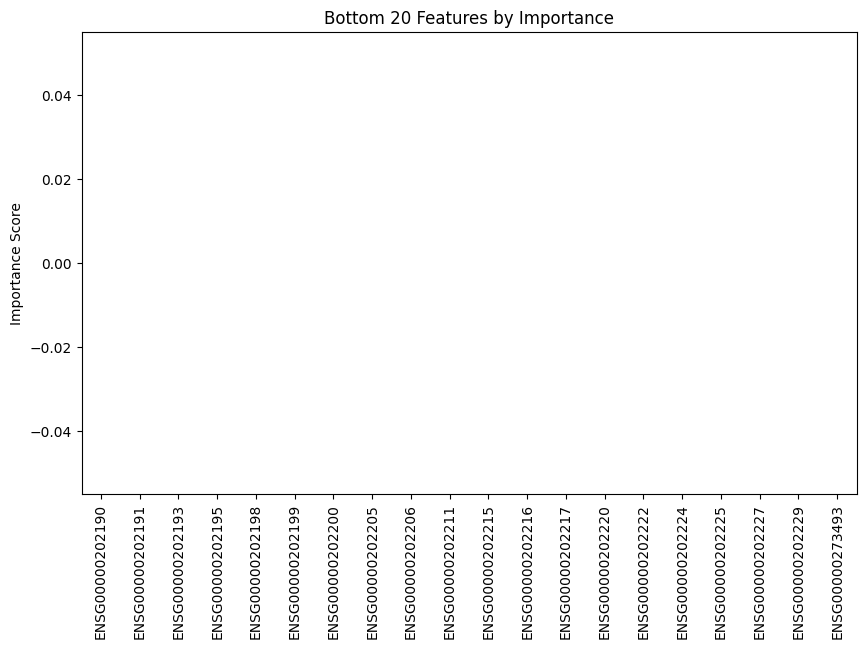

In [12]:
# Bottom 20 least important features
print("\nBottom 20 Features by Importance:")
print(feature_importances.tail(20))

# Plot Bottom 20 Features
feature_importances.tail(20).plot(kind='bar', figsize=(10, 6))
plt.title('Bottom 20 Features by Importance')
plt.ylabel('Importance Score')
plt.show()


In [13]:
# Interpretation
if feature_importances.max() > 0:
    print("\nGenes that increase the probability of cancer have higher importance scores.")
else:
    print("\nGenes with negative importance scores decrease the probability of cancer.")


Genes that increase the probability of cancer have higher importance scores.
